In [1]:
%ls

README.md                            job_example.sh
binned_ds_10/                        top100threads_dirty/
binned_ds_6/                         top100threads_liwc_reduced/
cfb_api.py                           top100threads_liwc_reduced_labelled/
cfbd api.ipynb                       win_probs/
cfbd_example.py                      wp_distribution.ipynb
game_threads.csv


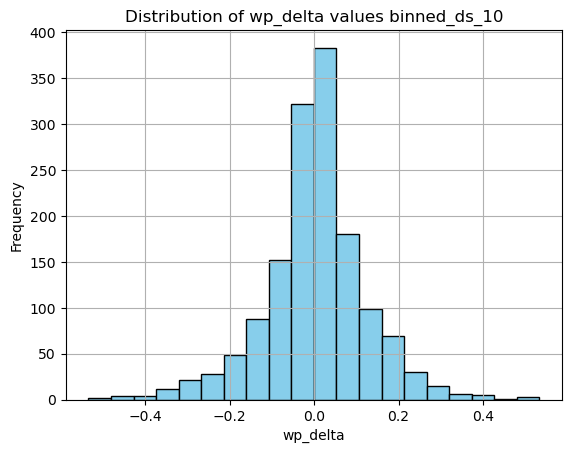

In [8]:
import os
import json
import matplotlib.pyplot as plt

def plot_wp_delta_distribution(directory):
    wp_delta_values = []

    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            file_path = os.path.join(directory, filename)
            
            # Read JSON file
            with open(file_path, 'r') as file:
                data = json.load(file)
                
            for entry in data:
            
                # print(entry)
                # Append wp_delta value to list
                wp_delta_values.append(entry['wp_delta'])
    
    # Plot the distribution of wp_delta values
    plt.hist(wp_delta_values, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('wp_delta')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of wp_delta values {directory}')
    plt.grid(True)
    plt.show()

# Specify the directory containing the JSON files
bin_10 = 'binned_ds_10'

# Call the function to plot the distribution
plot_wp_delta_distribution(bin_10)

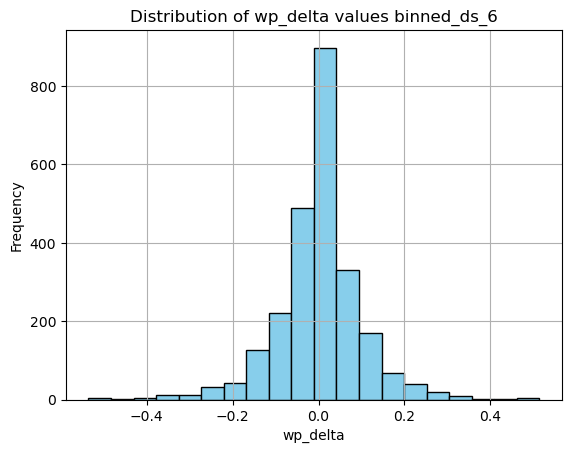

In [9]:
# Specify the directory containing the JSON files
bin_6 = 'binned_ds_6'

# Call the function to plot the distribution
plot_wp_delta_distribution(bin_6)